<div align="center">
  <img src="logoinpe.png">
</div>


# Análise Estatística e Espectral de Processos Estocásticos (CAP-239-4)

<hr>

Docentes:
- Dr. Reinaldo Rosa
- Dr. Leonardo B. L. Santos

Discentes:
 - Fernando Cossetin;
 - Felipe Menino Carlos;
 - Felipe Perin.

**Atividade**: Verificação de possíveis formas de identificar o fim da pandemia através das previsões realizadas pelo modelo de previsão de casos diários implementado.

**Descrição da atividade**: Para a realização desta atividade, faz-se a verificação do comportamento do modelo em diferentes escalar de tempos de previsão.

<hr>

In [1]:
# Feito para mudar para o diretório onde está o script covidmodeler.py
import os
os.chdir('../3_modelo_previsao_covid19/')

**Importando os módulos do modelo**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from covidmodeler import (
    covidmodeler, load_owd, generate_fiocruz_datamean,
    WeightSpectraCase1, WeightSpectraCase2, organize_data,
    plot_g_and_s
)

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_ALL, '')

'pt_BR.UTF-8'

**Importando os dados**

Para validar os resultados do modelo, é feito inicialmente o carregamento dos dados utilizados. Em seguida os dados são filtrados para evitar que grandes quantidades de valores zero sejam consideradas.

In [3]:
data_owd = load_owd()
data_owd = data_owd[data_owd.index >= '2020-04-01']

Como o objetivo deste documento é apresentar o comportamento do modelo implementado, frente a diferentes quantidade de dias de previsão, inicialmente, faz-se a geração de diferentes quantidades de previsões. O país utilizado como referência será o Brasil e todas as previsões vão partir do dia 08/04/2020.

In [4]:
data_owd_brazil = data_owd[data_owd["iso_code"] == "BRA"]
data_owd_brazil = generate_fiocruz_datamean(data_owd_brazil)

# Teste 1 - Verificação da influência dos espectros de peso

Esta seção apresenta uma bateria de testes que busca entender o comportamento dos valores $g$ e $s$ com o crescimento da quantidade de dias previstos.

**Simulação com espectro de peso 1**

A primeira bateria de testes é feita com o espectro de peso 1.

In [5]:
start_date = '2020-04-08'

Função auxiliar para padronizar o formato das datas

In [6]:
def remove_date_tz(data, datecol = 'date'):
    data.set_index(datecol, inplace = True)
    data.index = data.index.tz_convert(tz = None)
    return data

In [7]:
predictedvalues_list = []
generated_parameters_list = []
generated_supression_parameters_list = []

for days_to_predict in range(20, 100):
    # Gerando as predições
    predictedvalues, generated_parameters, generated_supression_parameters = \
                    covidmodeler(data_owd_brazil, start_date, days_to_predict, WeightSpectraCase1, 
                                 isIncomplete = False, usePredict = True)
    
    # Salvando os resultados
    predictedvalues_list.append(remove_date_tz(predictedvalues))
    generated_parameters_list.append(remove_date_tz(generated_parameters, 'reference_date'))
    generated_supression_parameters_list.append(remove_date_tz(generated_supression_parameters, 'reference_date'))

**Visualizando alguns dos resultados gerados**

Para verificar o comportamento do modelo, é feita a visualização de predições geradas com diferentes quantidades de dias sendo consideradas.

> Note a escala dos gráficos, elas foram mantidas diferentes! O que indica que o crescimento de um subplot é muito diferente de outro. Isso foi feito já que como o crescimento é exponencial, a comparação fica complicada após alguns valores

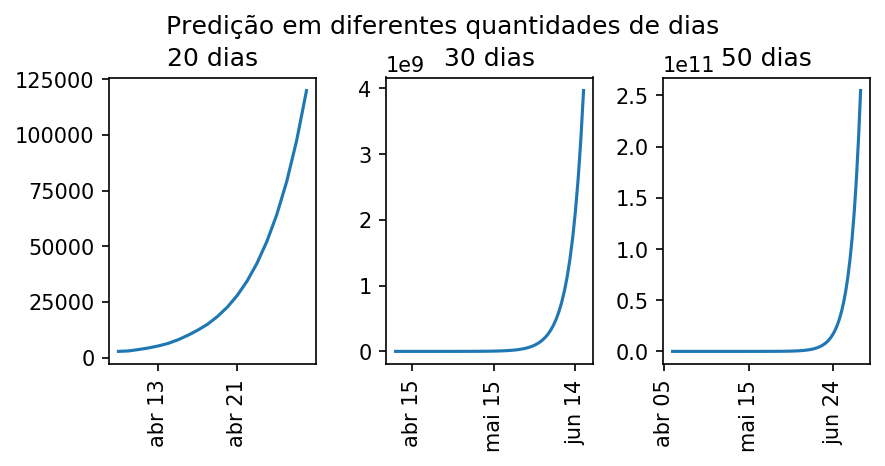

In [8]:
plt.figure(dpi = 150, figsize = (6, 3))

ax = plt.subplot(1, 3, 1)
plt.title("20 dias")
plt.plot(predictedvalues_list[0])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.xticks(rotation = 90)


ax = plt.subplot(1, 3, 2)
plt.title("30 dias")
plt.plot(predictedvalues_list[50])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.xticks(rotation = 90)

ax = plt.subplot(1, 3, 3)
plt.title("50 dias")
plt.plot(predictedvalues_list[70])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.xticks(rotation = 90)

plt.suptitle("Predição em diferentes quantidades de dias", y = 1.02)
plt.tight_layout()
plt.show()

Na Figura gerada acima, perceba que os valores apenas crescem, apresentando um comportamento exponencial no início das iterações. Para que a escala de crescimento fique evidente, abaixo é feito a mesma figura com os eixos compartilhados.

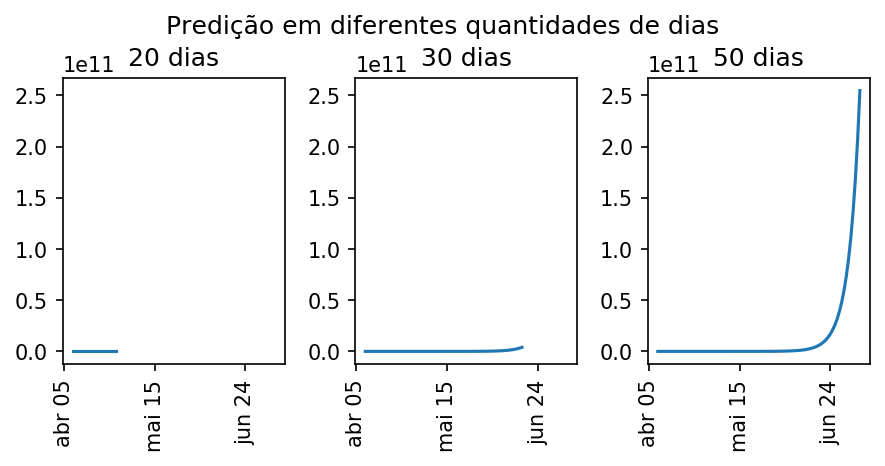

In [9]:
plt.figure(dpi = 150, figsize = (6, 3))

ax = plt.subplot(1, 3, 1)
plt.title("20 dias")
plt.plot(predictedvalues_list[0])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.xticks(rotation = 90)


ax = plt.subplot(1, 3, 2, sharex = ax, sharey = ax)
plt.title("30 dias")
plt.plot(predictedvalues_list[50])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.xticks(rotation = 90)

ax = plt.subplot(1, 3, 3, sharex = ax, sharey = ax)
plt.title("50 dias")
plt.plot(predictedvalues_list[70])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.xticks(rotation = 90)

plt.suptitle("Predição em diferentes quantidades de dias", y = 1.02)
plt.tight_layout()
plt.show()

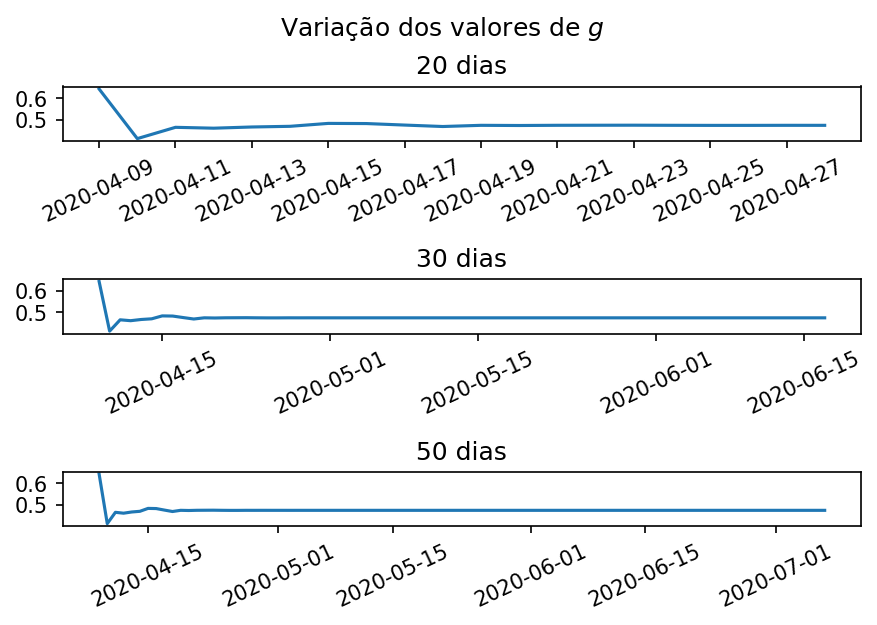

In [10]:
plt.figure(dpi = 150, figsize = (6, 4))

plt.subplot(3, 1, 1)
plt.title("20 dias")
plt.plot(generated_parameters_list[0].g)
plt.xticks(rotation = 25)

plt.subplot(3, 1, 2)
plt.title("30 dias")
plt.plot(generated_parameters_list[50].g)
plt.xticks(rotation = 25)

plt.subplot(3, 1, 3)
plt.title("50 dias")
plt.plot(generated_parameters_list[70].g)
plt.xticks(rotation = 25)

plt.suptitle("Variação dos valores de $g$", y = 1.03)
plt.tight_layout()
plt.show()

Os valores de $g$, depois de um certo período passaram a ter comportamento constante, o que pode ser utilizado para explicar o motivo do crescimento constante dos valores, uma vez que não há aumento nem diminuição deste valor. 

Outro ponto de vista a considerar são os valores de $s$.


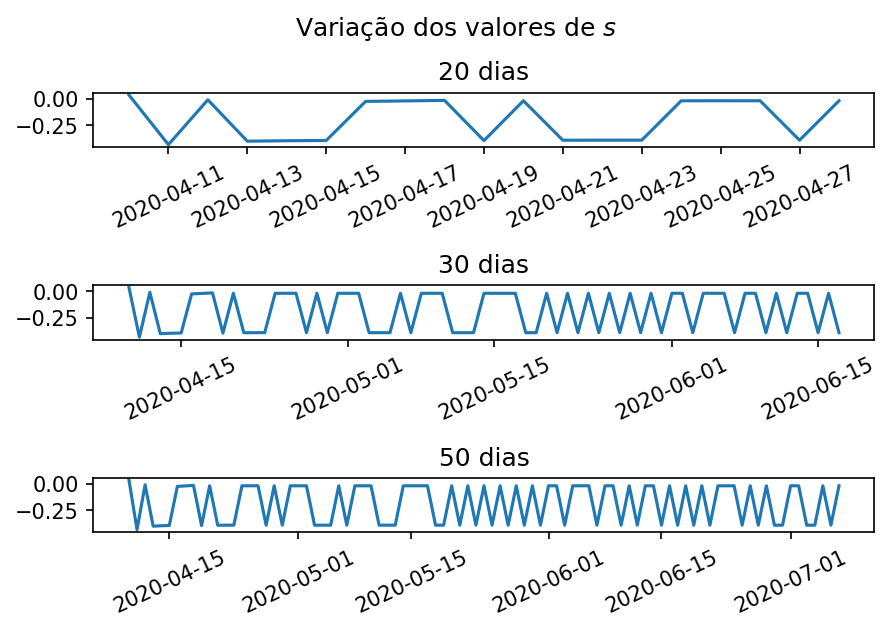

In [11]:
plt.figure(dpi = 150, figsize = (6, 4))

plt.subplot(3, 1, 1)
plt.title("20 dias")
plt.plot(generated_supression_parameters_list[0].s)
plt.xticks(rotation = 25)

plt.subplot(3, 1, 2)
plt.title("30 dias")
plt.plot(generated_supression_parameters_list[50].s)
plt.xticks(rotation = 25)

plt.subplot(3, 1, 3)
plt.title("50 dias")
plt.plot(generated_supression_parameters_list[70].s)
plt.xticks(rotation = 25)

plt.suptitle("Variação dos valores de $s$", y = 1.04)
plt.tight_layout()
plt.show()

**Simulação com espectro de peso 2**

Da mesma maneira como feito anteriormente, testes são feitos para a validação e verificação dos resultados, porém, nesta seção o espectro de peso 2 é considerado.

In [12]:
predictedvalues_list = []
generated_parameters_list = []
generated_supression_parameters_list = []

for days_to_predict in range(20, 100):
    # Gerando as predições
    predictedvalues, generated_parameters, generated_supression_parameters = \
                    covidmodeler(data_owd_brazil, start_date, days_to_predict, WeightSpectraCase2, 
                                 isIncomplete = False, usePredict = True)
    
    # Salvando os resultados
    predictedvalues_list.append(remove_date_tz(predictedvalues))
    generated_parameters_list.append(remove_date_tz(generated_parameters, 'reference_date'))
    generated_supression_parameters_list.append(remove_date_tz(generated_supression_parameters, 'reference_date'))

A mesma visualização realizada no teste anterior é aplicada aqui.

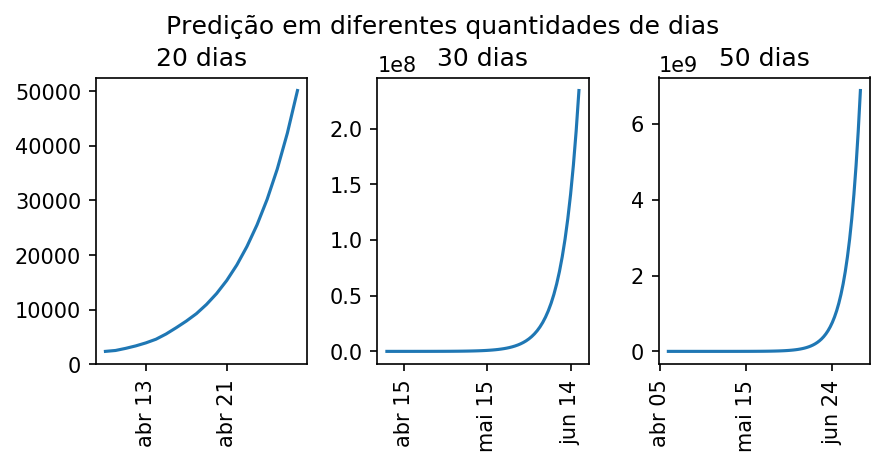

In [13]:
plt.figure(dpi = 150, figsize = (6, 3))

ax = plt.subplot(1, 3, 1)
plt.title("20 dias")
plt.plot(predictedvalues_list[0])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.xticks(rotation = 90)


ax = plt.subplot(1, 3, 2)
plt.title("30 dias")
plt.plot(predictedvalues_list[50])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.xticks(rotation = 90)

ax = plt.subplot(1, 3, 3)
plt.title("50 dias")
plt.plot(predictedvalues_list[70])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.xticks(rotation = 90)

plt.suptitle("Predição em diferentes quantidades de dias", y = 1.02)
plt.tight_layout()
plt.show()

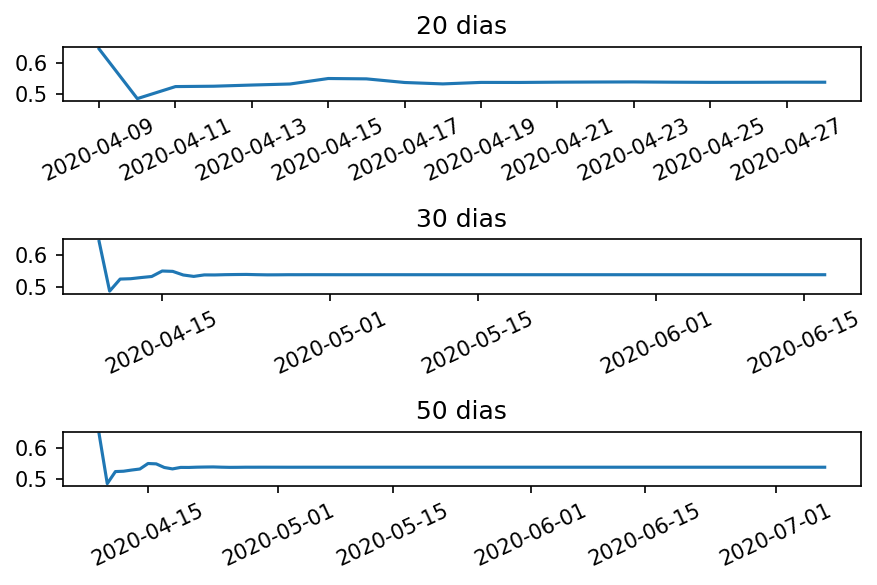

In [14]:
plt.figure(dpi = 150, figsize = (6, 4))

plt.subplot(3, 1, 1)
plt.title("20 dias")
plt.plot(generated_parameters_list[0].g)
plt.xticks(rotation = 25)

plt.subplot(3, 1, 2)
plt.title("30 dias")
plt.plot(generated_parameters_list[50].g)
plt.xticks(rotation = 25)

plt.subplot(3, 1, 3)
plt.title("50 dias")
plt.plot(generated_parameters_list[70].g)
plt.xticks(rotation = 25)

plt.tight_layout()
plt.show()

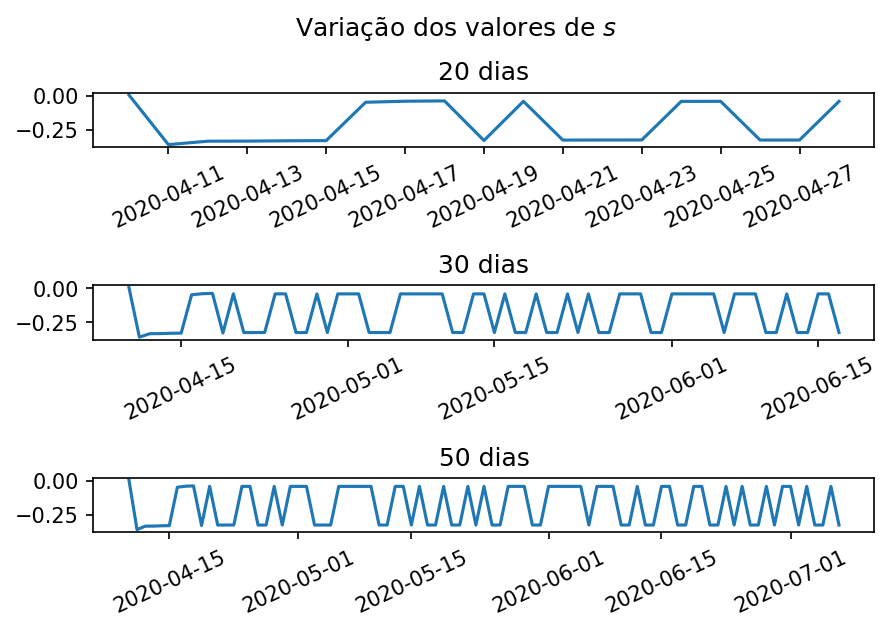

In [15]:
plt.figure(dpi = 150, figsize = (6, 4))

plt.subplot(3, 1, 1)
plt.title("20 dias")
plt.plot(generated_supression_parameters_list[0].s)
plt.xticks(rotation = 25)

plt.subplot(3, 1, 2)
plt.title("30 dias")
plt.plot(generated_supression_parameters_list[50].s)
plt.xticks(rotation = 25)

plt.subplot(3, 1, 3)
plt.title("50 dias")
plt.plot(generated_supression_parameters_list[70].s)
plt.xticks(rotation = 25)

plt.suptitle("Variação dos valores de $s$", y = 1.04)
plt.tight_layout()
plt.show()

Como é possível perceber, os valores gerados tem comportamento igual ao visto no teste 1, desta forma, mesmo com o crescimento inicial suave, percebe-se que o comportamento exponencial também está presente para o segundo espectro de pesos.

# Teste 2 - Tendência das séries

Esta segunda bateria de testes apresenta o comportamento do modelo frente a séries temporais que tem sua tendência não mais crescendo, como no caso da Itália, que será utilizado como exemplo para estes testes. Da mesma forma como feito anteriormente, as previsões para estes testes começam em 08/04/2020

In [16]:
data_owd_ita = data_owd[data_owd["iso_code"] == "ITA"]
data_owd_ita = generate_fiocruz_datamean(data_owd_ita)

**Visualizando a série temporal**

Inicialmente, faz-se a visualização da série temporal de quantidade de novos casos da Itália

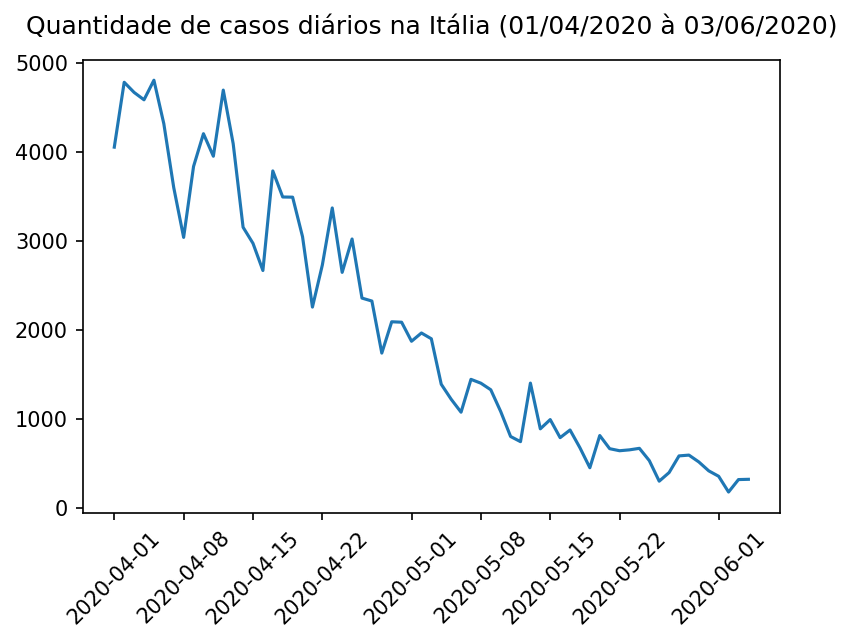

In [17]:
plt.figure(dpi = 150)

plt.plot(data_owd_ita.new_cases)
plt.xticks(rotation = 45)
plt.title("Quantidade de casos diários na Itália (01/04/2020 à 03/06/2020)", y = 1.03)

plt.show()

Para avaliar o comportamento do modelo, faz-se então a predição para 20 dias na Itália. Para este caso, o espectro de peso 1 é considerado.

In [18]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                    covidmodeler(data_owd_ita, start_date, 20, WeightSpectraCase1, 
                                 isIncomplete = False, usePredict = True)

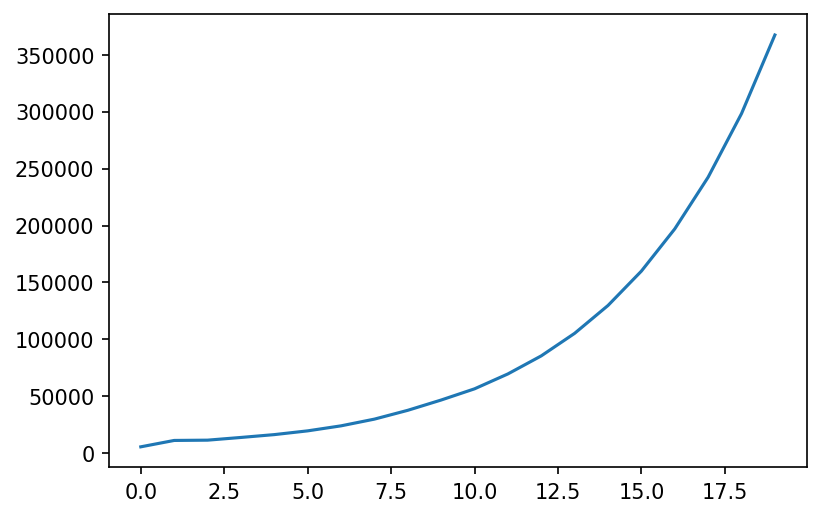

In [19]:
plt.figure(dpi = 150)
predictedvalues.new_cases.plot()

Perceba que mesmo com a tendência dos dados caíndo, o modelo apresenta crescimentos. Abaixo são apresentados as curvas de $g$ e $s$ para avaliação.

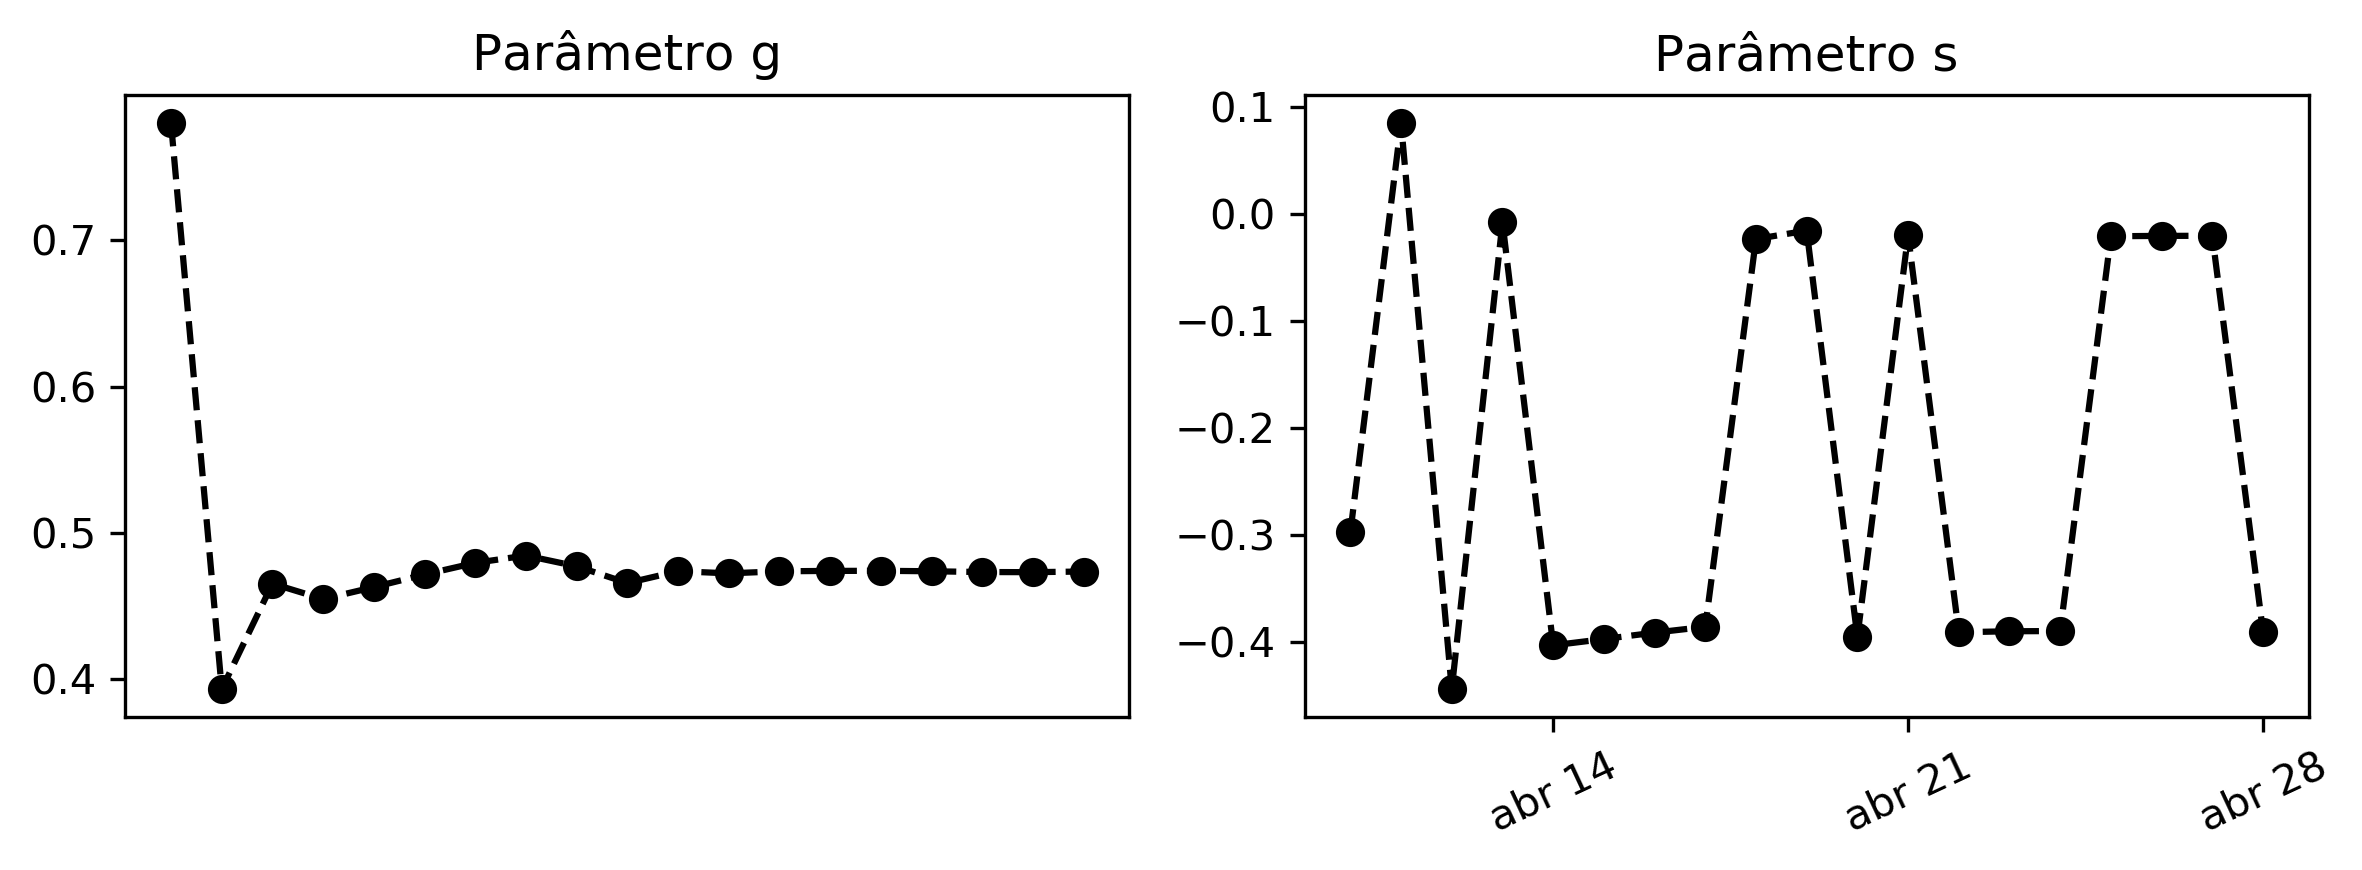

In [20]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

De maneira similiar ao comportamento apresentado em todos os testes anteriores, mesmo para um comportamento decrescente nos dados reais, há um valor de $g$ que converge a um determinado valor e continua assim até a última predição, o que pode explicar o comportamento crescente dos dados, além do valor de $s$ também variar de forma semelhante ao que já foi apresentado anteriormente.

Para evitar questões relacionadas ao viés das datas que estão sendo trabalhadas, faz-se o carregamento dos dados originais e então, a mesma predição é realizada considerando desde o primeiro dia que possuí mais que 50 casos.

In [21]:
data_owd = load_owd() # Carregando os dados

Realizando filtro de quantidade de casos

In [22]:
data_owd = data_owd[data_owd.new_cases > 50]

Recuperando novamente os dados da Itália, desta vez, do novo conjunto de dados

In [23]:
data_owd_ita = data_owd[data_owd["iso_code"] == "ITA"]
data_owd_ita = generate_fiocruz_datamean(data_owd_ita)

In [24]:
data_owd_ita.head(8)

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,fiocruz_estimate,fiocruz_mean
date,,,,,,,,,,,,,,,,,,,,,
2020-02-23,ITA,Europe,Italy,79,62,2,2,1.307,1.025,0.033,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,744,403.0
2020-02-24,ITA,Europe,Italy,132,53,2,0,2.183,0.877,0.033,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,636,344.5
2020-02-25,ITA,Europe,Italy,229,97,6,4,3.788,1.604,0.099,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,1164,630.5
2020-02-26,ITA,Europe,Italy,322,93,11,5,5.326,1.538,0.182,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,1116,604.5
2020-02-27,ITA,Europe,Italy,400,78,12,1,6.616,1.290,0.198,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,936,507.0
2020-02-28,ITA,Europe,Italy,650,250,17,5,10.751,4.135,0.281,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,3000,1625.0
2020-02-29,ITA,Europe,Italy,888,238,21,4,14.687,3.936,0.347,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,2856,1547.0
2020-03-01,ITA,Europe,Italy,1128,240,29,8,18.656,3.969,0.480,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,2880,1560.0


Olhando a estrutura dos dados, o primeiro valor válido é o 01/03/2020, já que existem valores a esta data. Então, ela será utilizada, porém, antes façamos a visualização da série de novos casos, para entender seu comportamento quando todos os dados são considerados.

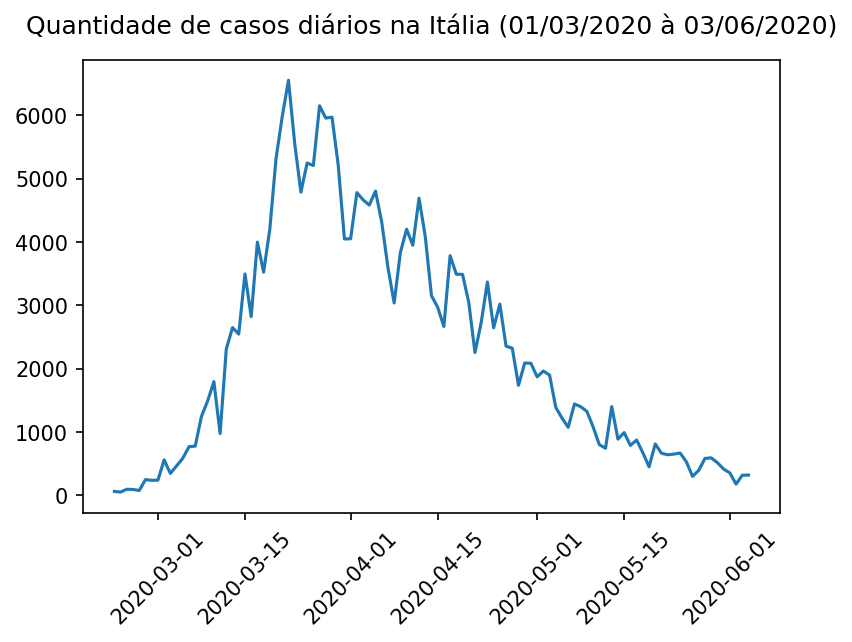

In [25]:
plt.figure(dpi = 150)

plt.plot(data_owd_ita.new_cases)
plt.xticks(rotation = 45)
plt.title("Quantidade de casos diários na Itália (01/03/2020 à 03/06/2020)", y = 1.03)

plt.show()

Como esperado, os valores chegam em um pico e depois começam a diminuir. Façamos a predição para 50 dias, já que neste intervalo a curva tem seu início de queda.

In [26]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                    covidmodeler(data_owd_ita, '2020-03-01', 50, WeightSpectraCase1, 
                                 isIncomplete = False, usePredict = True)

generated_parameters = remove_date_tz(generated_parameters, 'reference_date')
predictedvalues = remove_date_tz(predictedvalues)

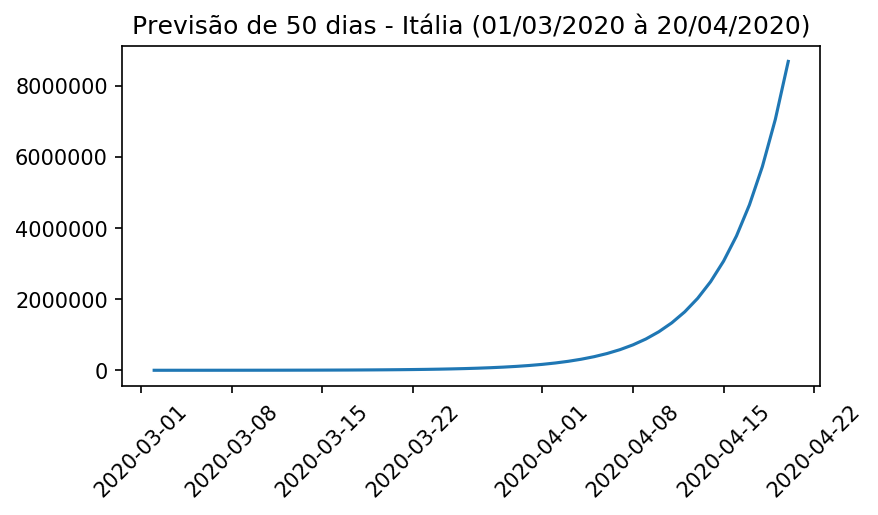

In [27]:
plt.figure(dpi = 150, figsize = (6, 3))

plt.title("Previsão de 50 dias - Itália (01/03/2020 à 20/04/2020)")
plt.plot(predictedvalues)
plt.xticks(rotation = 45)
plt.show()

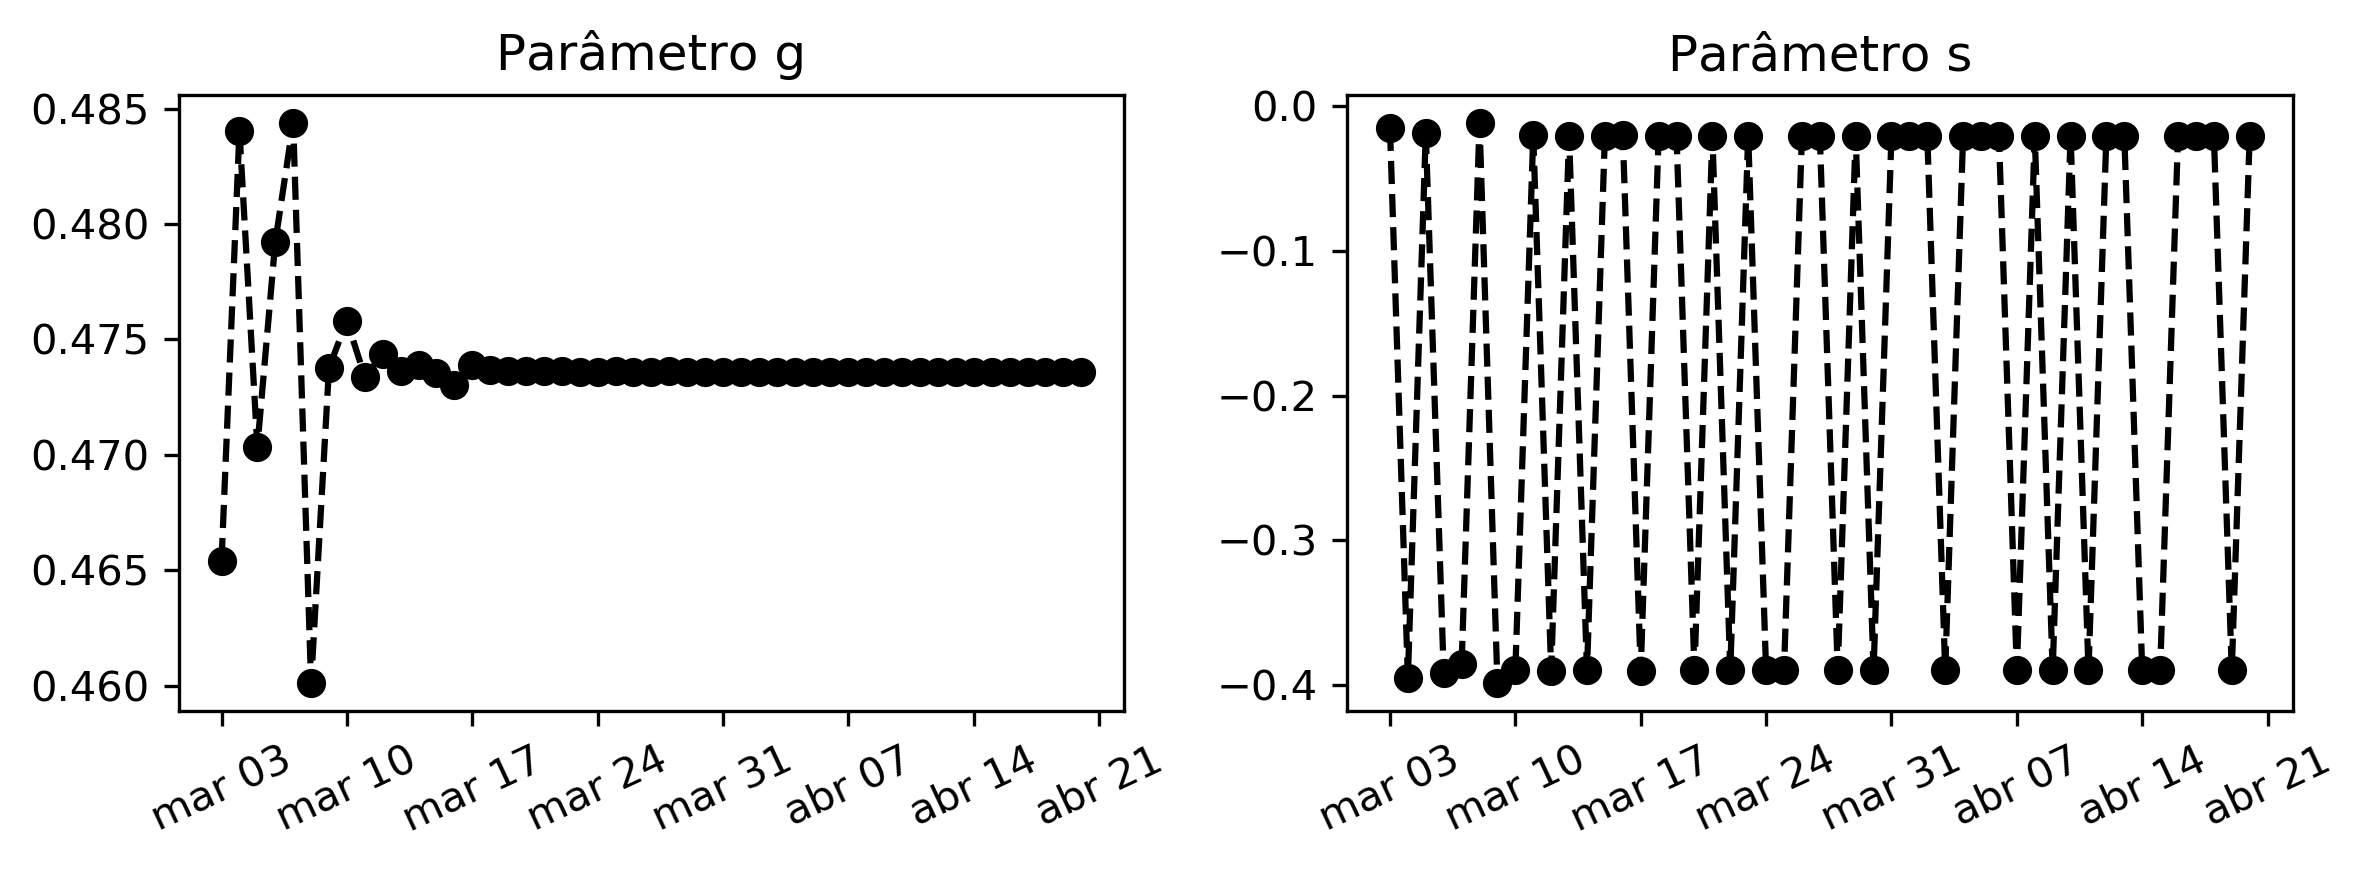

In [28]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

Mesmo com a alteração e consideração de mais dados no modelo, o comportamento permanece exatamente o mesmo, indicando que problemas relacionados a própria forma dos fatores é identificada.